# Supervised Machine Learning Models

In [14]:
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(".."))

from src.evaluation import calculate_ari, calculate_accuracy
from src.models import fit_rf, fit_mlp, fit_xg
from src.plotting import plot_time_series

%store -r dataset
X = dataset[0]
z_true = dataset[1]
difficulty = dataset[2]
X_pca = dataset[3]

In [ ]:
# Train/Test Split

T = len(X)
pct_split = 0.6
split = int(pct_split * T)

X_train, X_test = X[:split], X[split:]
y_train, y_test = z_true[:split], z_true[split:]

# Random Forest

In [16]:
rf, y_pred_rf = fit_rf(X_train, y_train, X_test)

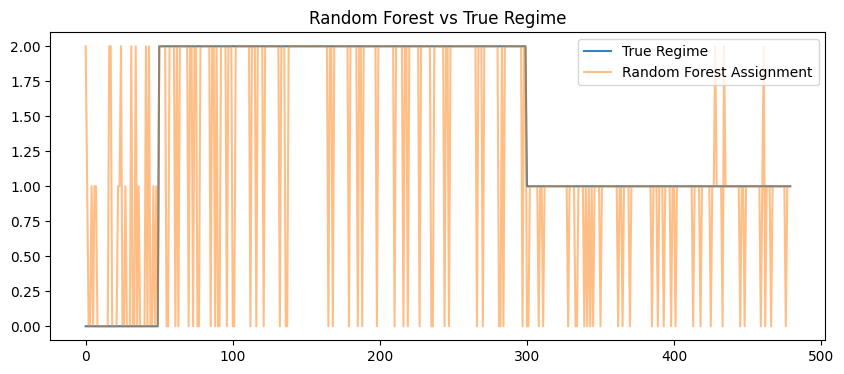

In [17]:
plot_time_series(y_pred_rf, y_test, 'Random Forest', 5, difficulty)

In [18]:
ari_rf = calculate_ari(y_test, y_pred_rf, 'Random Forest')
acc_rf = calculate_accuracy(y_test, y_pred_rf, 'Random Forest')

Random Forest ARI: 0.610
Random Forest Accuracy: 0.808


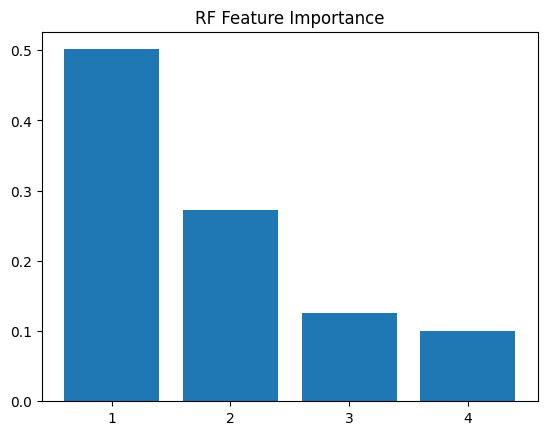

In [19]:
# Feature Importance Plot

plt.bar(range(X.shape[1]), rf.feature_importances_)
plt.xticks(ticks = [0, 1, 2, 3], labels = ['1', '2', '3', '4'])
plt.title("RF Feature Importance")
plt.show()

# Shallow Neural Network (MLP)

In [20]:
mlp, y_pred_mlp = fit_mlp(X_train, y_train, X_test)

Iteration 1, loss = 1.47533640
Validation score: 0.375000
Iteration 2, loss = 1.41261499
Validation score: 0.375000
Iteration 3, loss = 1.35765268
Validation score: 0.402778
Iteration 4, loss = 1.30896494
Validation score: 0.402778
Iteration 5, loss = 1.26545916
Validation score: 0.430556
Iteration 6, loss = 1.22635043
Validation score: 0.402778
Iteration 7, loss = 1.19067315
Validation score: 0.402778
Iteration 8, loss = 1.15888657
Validation score: 0.388889
Iteration 9, loss = 1.13071540
Validation score: 0.388889
Iteration 10, loss = 1.10386968
Validation score: 0.388889
Iteration 11, loss = 1.07848304
Validation score: 0.402778
Iteration 12, loss = 1.05550416
Validation score: 0.444444
Iteration 13, loss = 1.03415909
Validation score: 0.472222
Iteration 14, loss = 1.01389790
Validation score: 0.486111
Iteration 15, loss = 0.99421102
Validation score: 0.527778
Iteration 16, loss = 0.97563984
Validation score: 0.527778
Iteration 17, loss = 0.95796757
Validation score: 0.555556
Iterat

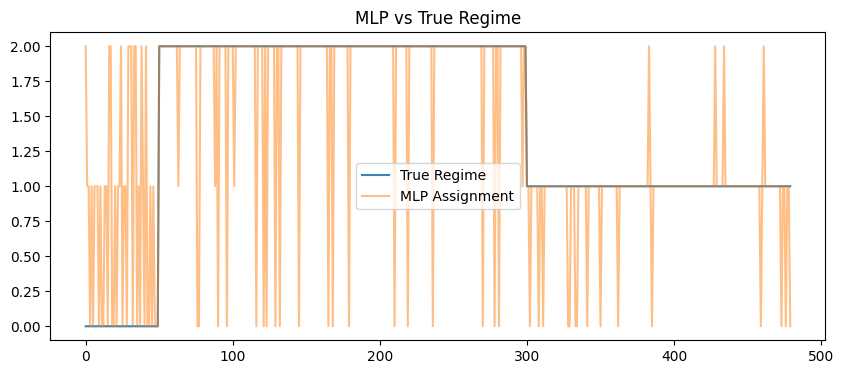

In [21]:
plot_time_series(y_pred_mlp, y_test, 'MLP', 5, difficulty)

In [22]:
ari_mlp = calculate_ari(y_test, y_pred_mlp, 'MLP')
acc_mlp = calculate_accuracy(y_test, y_pred_mlp, 'MLP')

MLP ARI: 0.691
MLP Accuracy: 0.852


# XGBoost for Supervised Regime Detection

In [23]:
xgb, y_pred_xg = fit_xg(X_train, y_train, X_test)

/Users/kentakayama/latent-regime-ml/venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:29:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


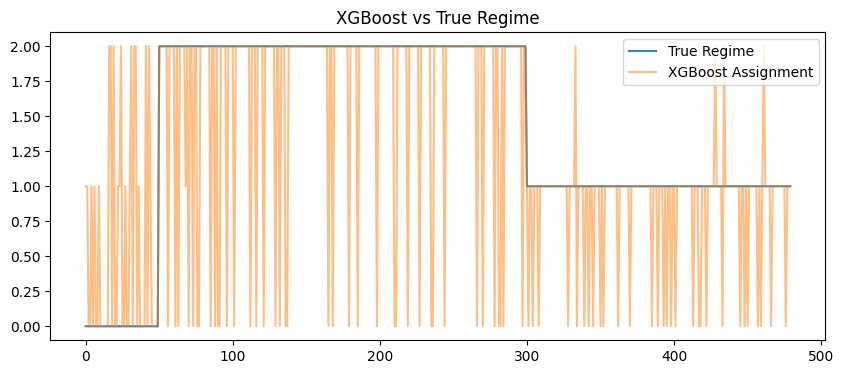

In [24]:
plot_time_series(y_pred_xg, y_test, 'XGBoost', 5, difficulty)

In [25]:
ari_xg = calculate_ari(y_test, y_pred_xg, 'XGBoost')
acc_xg = calculate_accuracy(y_test, y_pred_xg, 'XGBoost')

XGBoost ARI: 0.601
XGBoost Accuracy: 0.804


In [26]:
dataset.append(split)
%store dataset
del dataset

%store -r results

results.extend([ari_rf, acc_rf, y_pred_rf, ari_mlp, acc_mlp, y_pred_mlp, ari_xg, acc_xg, y_pred_xg])
%store results
del results

Stored 'dataset' (list)
Stored 'results' (list)
